<a href="https://colab.research.google.com/github/ronmaccms/DE_Team/blob/main/week2/TestSmallData_ANNclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Classification using Artificial Neural Networks

#Multi-Class Classification


In this example we will use a darts dataset that consist of dart throws by different competitors. The coordinate pairs xCoord and yCoord show where each dart landed. Each dart can only be thrown by one competitor. That means our classes are mutually exclusive, no dart can be thrown by two different competitors simultaneously.

Based on the landing position of previously thrown darts we should be able to distinguish between throwers if there's enough variation among them. In our pairplot we can see players tend to aim at certain regions of the board.

The model for this dataset has two neurons as inputs,since our predictors are xCoord and yCoord. We will define them using the input_shape argument



In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning_Datasets for design/DATASET_darts.csv')
print(data)

       xCoord    yCoord competitor
0    0.196451 -0.520341      Steve
1    0.476027 -0.306763      Susan
2    0.003175 -0.980736    Michael
3    0.294078  0.267566       Kate
4   -0.051120  0.598946      Steve
..        ...       ...        ...
795  0.320435 -0.327131       Kate
796 -0.179372  0.594201      Steve
797  0.530315 -0.833321    Michael
798 -0.287258  0.890928    Michael
799 -0.628403 -0.140868      Susan

[800 rows x 3 columns]


In [ ]:
print(data["competitor"].unique())

['Steve' 'Susan' 'Michael' 'Kate']


we have 800 throws by 4 competitors

<Axes: xlabel='xCoord', ylabel='yCoord'>

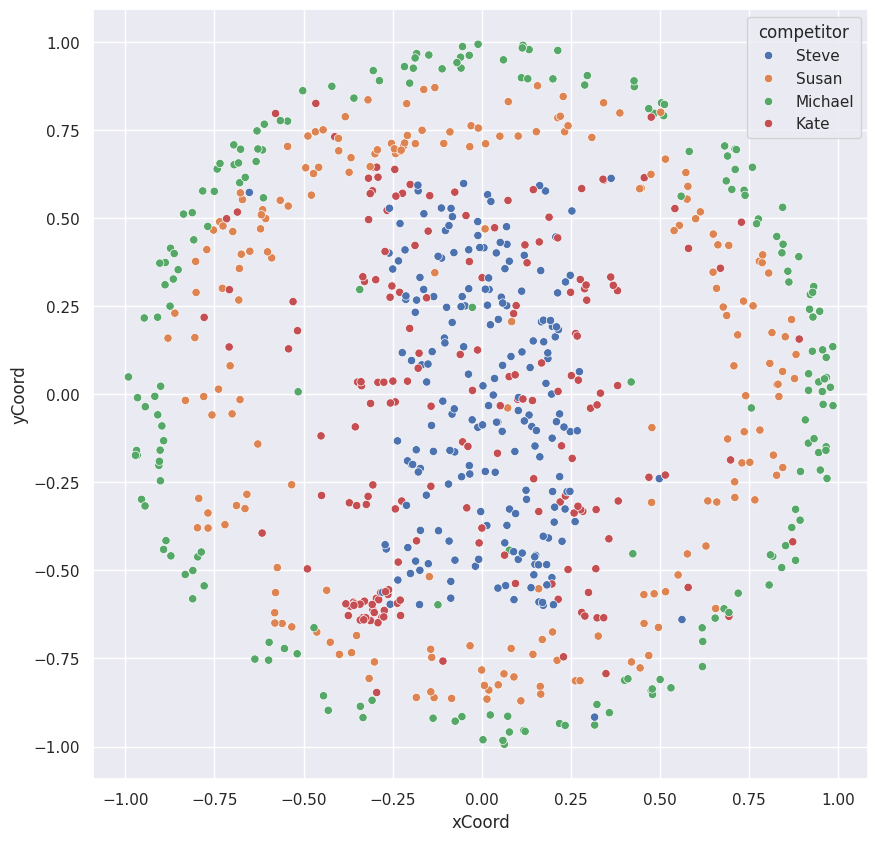

In [ ]:
#Look at data

sns.scatterplot(x="xCoord", y="yCoord", hue="competitor", data=data)

##Prepare Data

**ENCODING**

The dataset["competitor"] column is strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation. This is because we just want one of the neurons to be activated by class

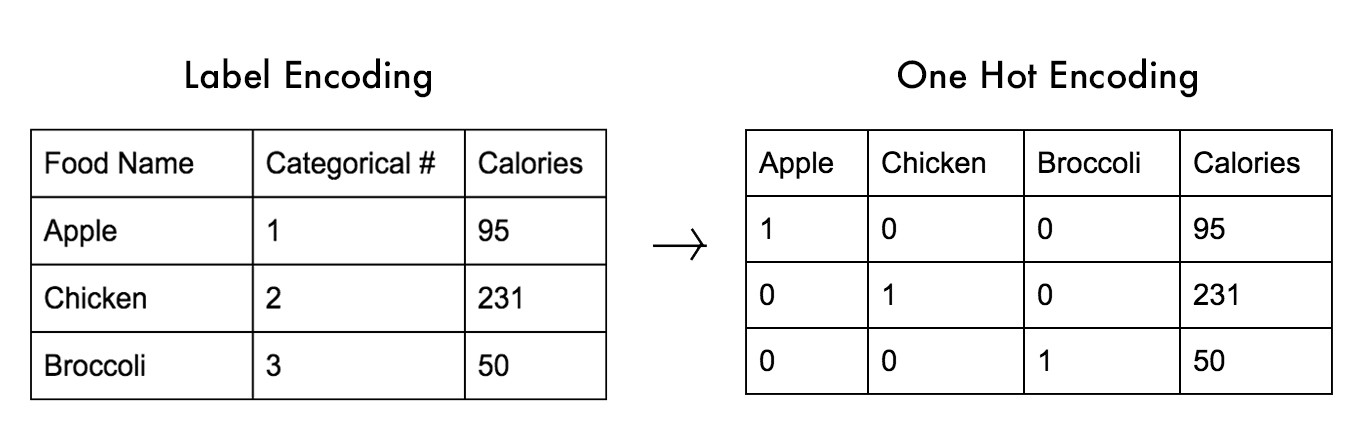

We first turn our response variable into a categorical variable with pandas Categorical, this allows us to redefine the column using the categorical codes (cat codes) of the different categories.

In [ ]:
# Transform into a categorical variable
data.competitor = pd.Categorical(data.competitor)

# Assign a number to each category (label encoding)
data.competitor = data.competitor.cat.codes

# Print the label encoded competitors
print('Label encoded competitors: \n',data.head())

Label encoded competitors: 
      xCoord    yCoord  competitor
0  0.196451 -0.520341           2
1  0.476027 -0.306763           3
2  0.003175 -0.980736           1
3  0.294078  0.267566           0
4 -0.051120  0.598946           2


steve is 2, susan is 3, micheal is 1 and kate is 0

Now that our categories are each represented by a unique integer, we can use the to_categorical function to turn them into one-hot encoded vectors, where each component is 0 except for the one corresponding to the labeled categories.

In [ ]:
#now we generate onhot vectors

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = data.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(data.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
#same code as last time

#declare features
X = data.iloc[:,0:2]

#declare targets "classes"
y = competitors


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way
print(X_train.shape)
print(y_train.shape)

(640, 2)
(640, 4)


#Build model

From the cheatSheet
Multiclass classification >>
      activation = relu for hidden layers / softmax for final layer
      loss = categorical cross entropy
      optimizer = adam
      input from data, is 2 columns
      output is 1 out of 4 classes

In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8, input_shape=(2,), activation='relu'))
# Add a dense layer with as many neurons as competitors
model.add(tf.keras.layers.Dense(4, activation="softmax"))

# Compile your model using categorical_crossentropy loss
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.1)

Epoch 1/200
18/18 [==============================] - 1s 17ms/step - loss: 1.4025 - accuracy: 0.2101 - val_loss: 1.3734 - val_accuracy: 0.3125
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 1.3435 - accuracy: 0.3125 - val_loss: 1.3338 - val_accuracy: 0.3594
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2995 - accuracy: 0.3611 - val_loss: 1.3017 - val_accuracy: 0.3906
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2549 - accuracy: 0.4149 - val_loss: 1.2585 - val_accuracy: 0.4219
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 1.2111 - accuracy: 0.4323 - val_loss: 1.2156 - val_accuracy: 0.4375
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 1.1670 - accuracy: 0.4549 - val_loss: 1.1830 - val_accuracy: 0.4531
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 1.1294 - accuracy: 0.4913 - val_loss: 1.1410 - val_accuracy: 0.5312
Epoch 8/200


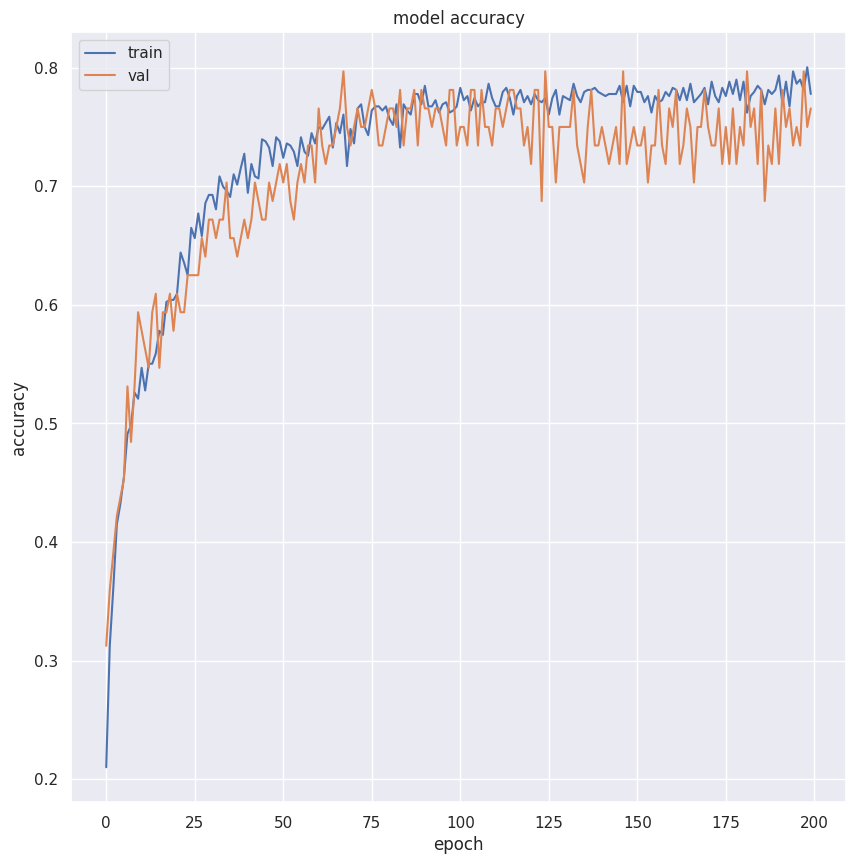

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

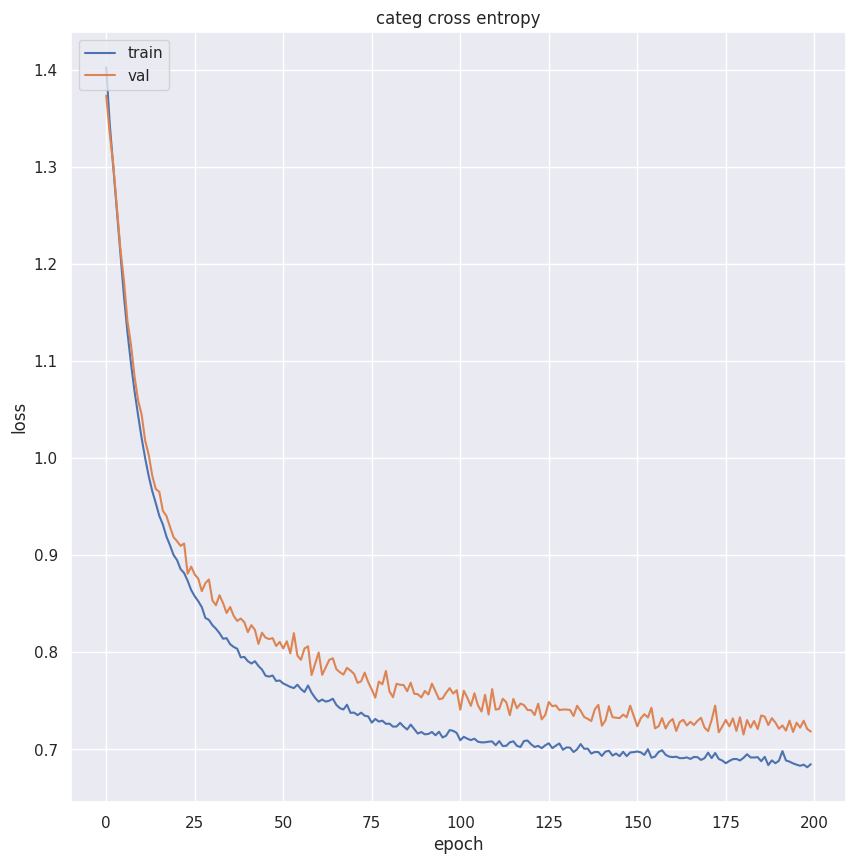

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('categ cross entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data

In [ ]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test,y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.9792 - accuracy: 0.6812
Accuracy: 0.6812499761581421


##Plot results

To draw a confusion matrix, we would need to go back from onehot encoding to class, we do that with .argmax method which finds which column has the highest score

5/5 [==============================] - 0s 2ms/step


(<Figure size 1000x1000 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

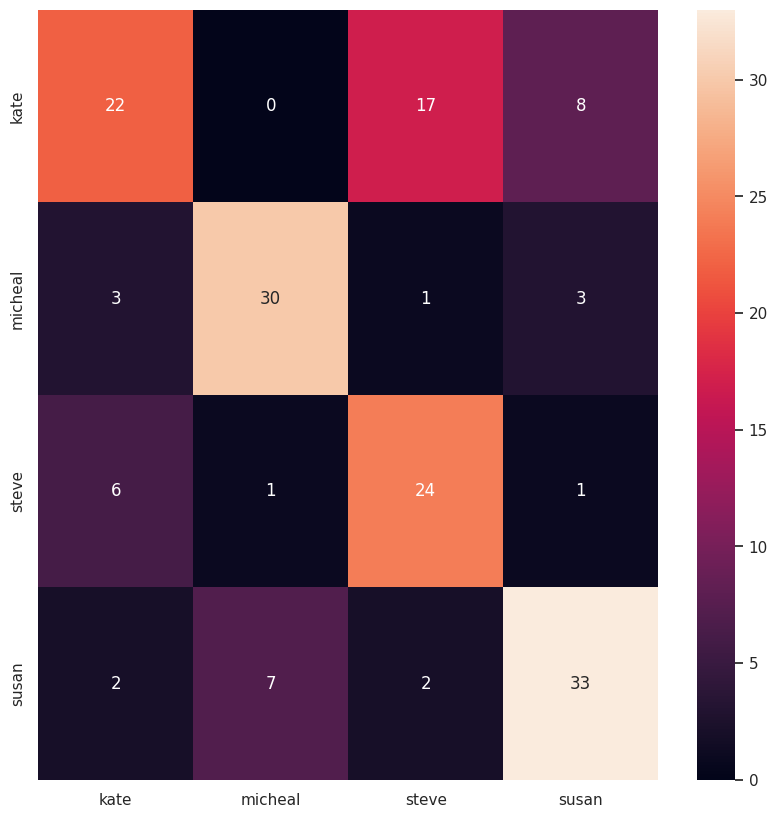

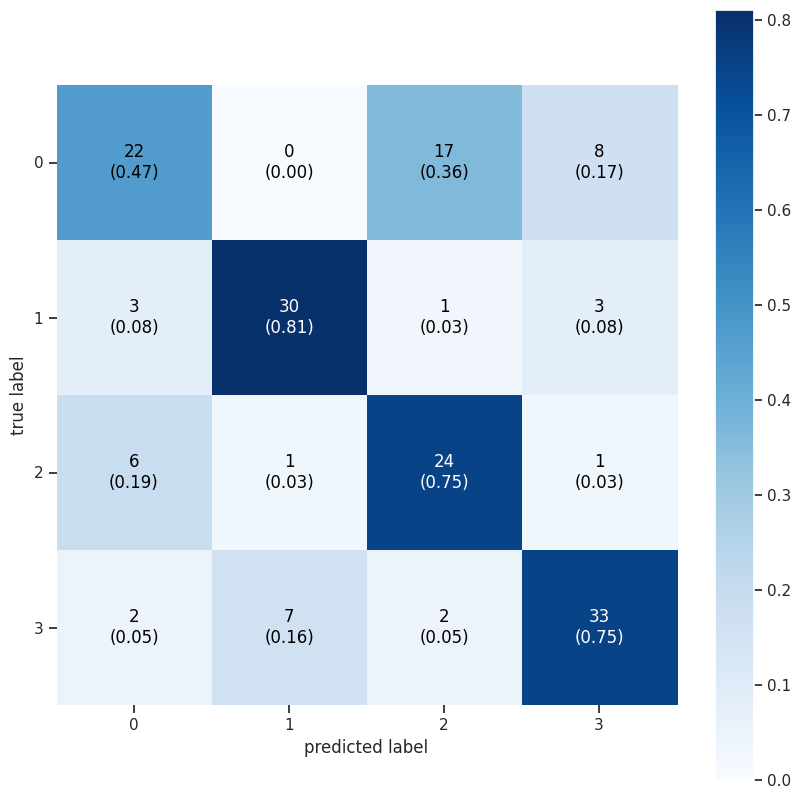

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#Get the predictions for the test set
y_pred = model.predict(X_test)

#instanciate the matrix
confmatrix = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

#Draw it in 2 different ways
sns.heatmap(confmatrix, xticklabels=["kate", "micheal", "steve", "susan"], yticklabels=["kate", "micheal", "steve", "susan"], annot = True)
plot_confusion_matrix(confmatrix,colorbar=True,show_absolute=True,show_normed=True,hide_spines = True)